In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff

from collections import Counter
from plotly.offline import iplot
from plotly import tools
from plotly import plotly
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_columns = 999
tools.set_credentials_file(username='nutorbit', api_key='uLAYVGzYmZitDzWriluV')

%matplotlib inline

In [7]:
# reference https://www.kaggle.com/zynicide/wine-reviews/home
df = pd.read_csv('./data/winemag-data_first150k.csv')
df = df[df.columns[1:]]

df.head()
df.describe()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            designation  points  price        province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            region_1           region_2             variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    winery  
0                    Heitz  
1  Bodega Carmen Rodríguez  
2                 Macauley  
3                    Ponzi  
4     Domaine de la Bégude

points          price
count  150930.000000  137235.000000
mean       87.888418      33.131482
std         3.222392      36.322536
min        80.000000       4.000000
25%        86.000000      16.000000
50%        88.000000      24.000000
75%        90.000000      40.000000
max       100.000000    2300.000000

'https://plot.ly/~nutorbit/31'

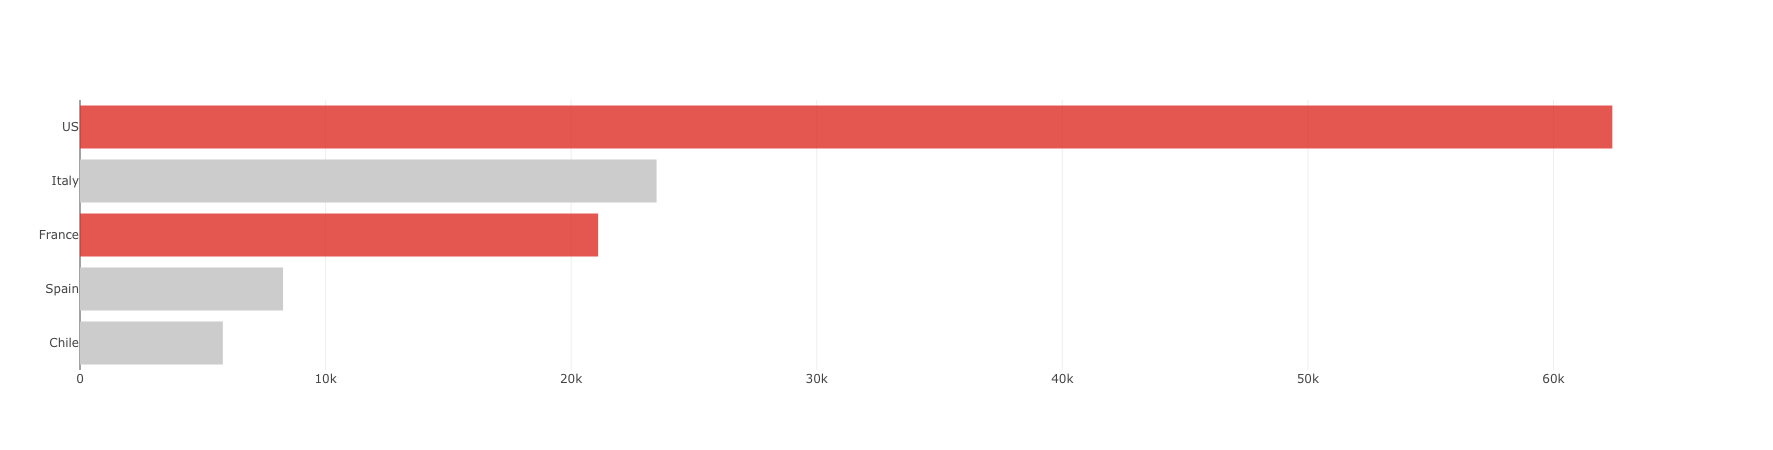

In [23]:
tmp = df.country.value_counts().sort_values()

data = [
    go.Bar(
        x = tmp[-5:].values,
        y = tmp[-5:].index,
        orientation = 'h',
        marker=dict(
            color=['rgba(204,204,204,1)', 'rgba(204,204,204,1)',
                   'rgba(222,45,38,0.8)', 'rgba(204,204,204,1)',
                   'rgba(222,45,38,0.8)']
        ),
    )
]

layout = go.Layout(
#     title='The most country has make a wine',
#     width = 1500,
#     height = 900
)

fig = go.Figure(data = data, layout=layout)
plotly.plot(fig)
iplot(fig)

In [25]:
t_wine_us_df = df[df.country == 'US']
t_wine_france_df = df[df.country == 'France']

In [26]:
wine_us_df = t_wine_us_df.loc[pd.notnull(t_wine_us_df.points)]
wine_france_df = t_wine_france_df.loc[pd.notnull(t_wine_france_df.points)]

# Which one is better?

In [27]:
wine_us_df.head()
wine_france_df.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
8      US  This re-named vineyard was formerly bottled as...   
9      US  The producer sources from two blocks of the vi...   

                     designation  points  price    province  \
0              Martha's Vineyard      96  235.0  California   
2  Special Selected Late Harvest      96   90.0  California   
3                        Reserve      96   65.0      Oregon   
8                         Silice      95   65.0      Oregon   
9           Gap's Crown Vineyard      95   60.0  California   

             region_1           region_2             variety     winery  
0         Napa Valley               Napa  Cabernet Sauvignon      Heitz  
2      Knights Valley             Sonoma     Sauvignon Blanc   Macauley  
3   Willamette Valley  Willamette Valley          Pinot Noir      Ponzi  
8  Chehalem Mountains  Willamette Valley          Pinot Noir  Bergström  
9        Sonoma Coast             Sonoma          Pinot Noir  Blue Farm

country                                        description  \
4   France  This is the top wine from La Bégude, named aft...   
13  France  This wine is in peak condition. The tannins an...   
18  France  Coming from a seven-acre vineyard named after ...   
33  France  Pale in color, this is nutty in character, wit...   
36  France  Gingery spice notes accent fresh pear and melo...   

                   designation  points  price          province  \
4                   La Brûlade      95   66.0          Provence   
13     Château Montus Prestige      95   90.0  Southwest France   
18               Le Pigeonnier      95  290.0  Southwest France   
33  Nonpareil Trésor Rosé Brut      90   22.0      France Other   
36                         NaN      90   60.0      Rhône Valley   

               region_1 region_2                  variety  \
4                Bandol      NaN       Provence red blend   
13              Madiran      NaN                   Tannat   
18               Cahors      NaN                   Malbec   
33         Vin Mousseux      NaN          Sparkling Blend   
36  Châteauneuf-du-Pape      NaN  Rhône-style White Blend   

                          winery  
4           Domaine de la Bégude  
13             Vignobles Brumont  
18            Château Lagrézette  
33                Bouvet-Ladubay  
36  Clos de L'Oratoire des Papes

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]



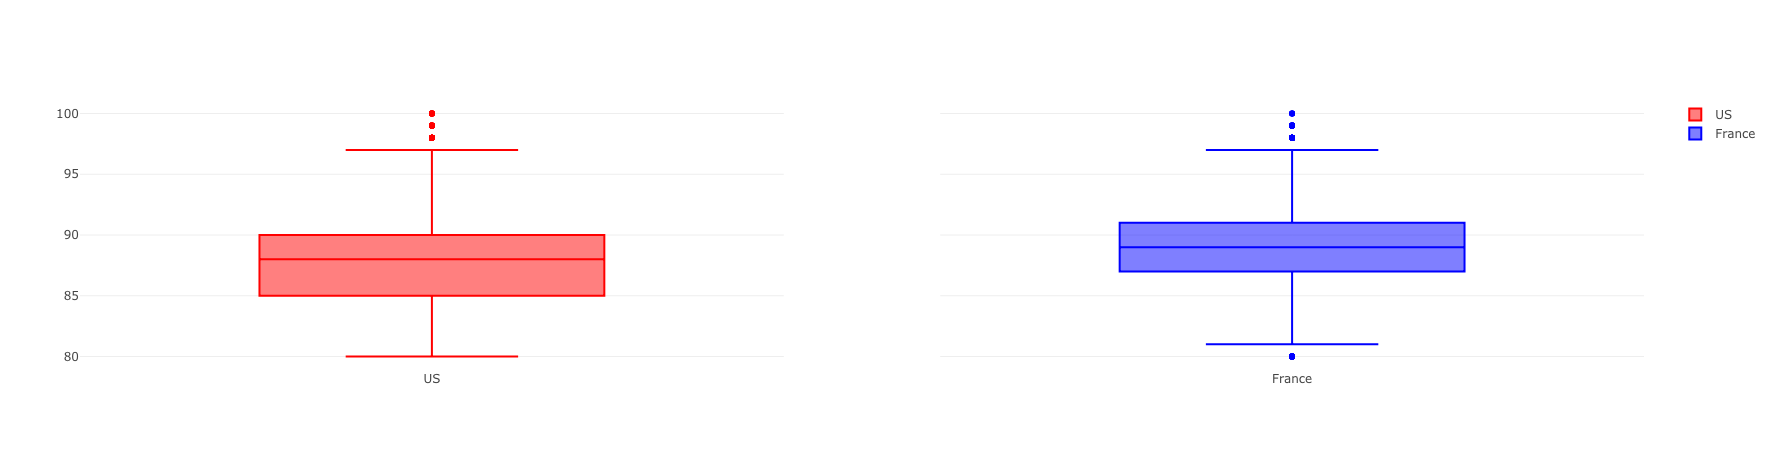

/home/nutorbitx/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



'https://plot.ly/~nutorbit/35'

In [31]:
us_trace = go.Box(
    y = wine_us_df.points,
    name='US',
    marker = dict(
        color = 'red',
    )
)

france_trace = go.Box(
    y = wine_france_df.points,
    name='France',
    marker = dict(
        color = 'blue',
    )
)

fig = tools.make_subplots(rows = 1, cols = 2, shared_yaxes=True)
fig.append_trace(us_trace, 1, 1)
fig.append_trace(france_trace, 1, 2)
# fig.layout.update(title='Wine points')

iplot(fig)
plotly.plot(fig)



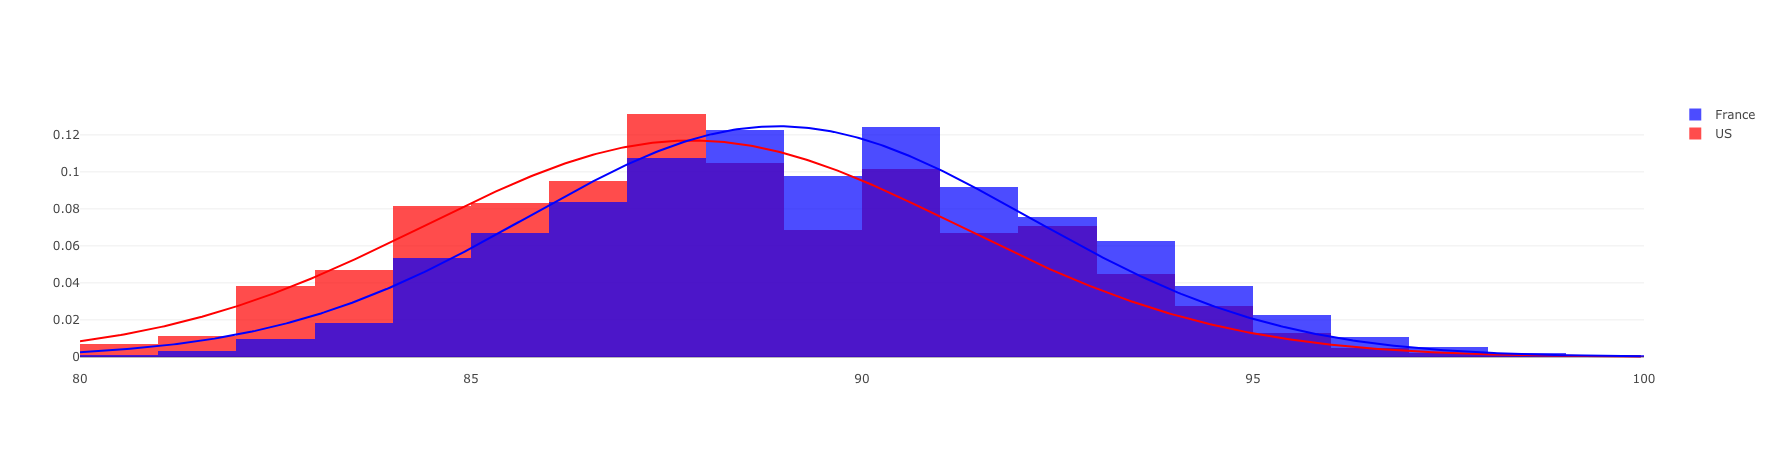

/home/nutorbitx/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/plotly/plotly/plotly.py:233: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.



'https://plot.ly/~nutorbit/39'

In [34]:
hist_data = [
    wine_us_df.points,
    wine_france_df.points
]

group_labels = ['US', 'France']
fig = ff.create_distplot(hist_data, group_labels, show_rug=False, curve_type='normal', colors=['red', 'blue'])
# fig.layout.update(title='Distribution of wine points')
iplot(fig)
plotly.plot(fig)

In [66]:
len(wine_us_df.points.index)
len(wine_france_df.points.index)

wine_us_df.points.mean()
wine_france_df.points.mean()

wine_us_df.points.std()**2
wine_france_df.points.std()**2

62397

21098

87.81878936487331

88.92586975068727

11.630105316825157

10.238046181451146

### Numnber of population

- US: <b>`62397`</b>
- FRANCE: <b>`21098`</b>

### Mean of points

- US: <b>`87.81`</b>
- FRANCE: <b>`88.92`</b>

### Variance of points

- US: <b>`11.63`</b>
- FRANCE: <b>`10.23`</b>

## Hypothesis Testing

เราตั้งสมมุติฐานไว้ว่า wine ของ France <b>ดีกว่า</b> US หรือไม่ ในระดับนัยสำคัญที่ 0.05

$$H_0:  US \geq France$$
$$H_1: US < France$$

$$μ_d: 87.81-88.92$$

$$H_0:  -1.11 \geq 0$$
$$H_1: -1.11 < 0$$

$$Z_{cal}: \frac{-1.11}{\sqrt{\frac{11.63}{62397} + \frac{10.23}{21098}}}$$

$$Z_{0.05}: 1.645$$

$$Reject: H_{0}$$
$$Z_{cal} < -Z_{0.05}$$
$$-42.84 < -1.645$$

$$Accept: H_{1}$$
$$หลังจากทดสอบสมมุติฐาน ทำให้สรุปได้ว่า คะแนน\space wine \space ของ\space Frace \space ดีกว่า\space US \space ด้วยระดับความเชื่อมัน\space 0.05$$

In [30]:
(((11.63/62397) + (10.23/21098))**0.5)

0.025908825706115652

# Price

In [37]:
wine_us_df = t_wine_us_df.loc[pd.notnull(t_wine_us_df.price)]
wine_france_df = t_wine_france_df.loc[pd.notnull(t_wine_france_df.price)]

In [38]:
wine_us_df.head()
wine_france_df.head()

country                                        description  \
0      US  This tremendous 100% varietal wine hails from ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
8      US  This re-named vineyard was formerly bottled as...   
9      US  The producer sources from two blocks of the vi...   

                     designation  points  price    province  \
0              Martha's Vineyard      96  235.0  California   
2  Special Selected Late Harvest      96   90.0  California   
3                        Reserve      96   65.0      Oregon   
8                         Silice      95   65.0      Oregon   
9           Gap's Crown Vineyard      95   60.0  California   

             region_1           region_2             variety     winery  
0         Napa Valley               Napa  Cabernet Sauvignon      Heitz  
2      Knights Valley             Sonoma     Sauvignon Blanc   Macauley  
3   Willamette Valley  Willamette Valley          Pinot Noir      Ponzi  
8  Chehalem Mountains  Willamette Valley          Pinot Noir  Bergström  
9        Sonoma Coast             Sonoma          Pinot Noir  Blue Farm

country                                        description  \
4   France  This is the top wine from La Bégude, named aft...   
13  France  This wine is in peak condition. The tannins an...   
18  France  Coming from a seven-acre vineyard named after ...   
33  France  Pale in color, this is nutty in character, wit...   
36  France  Gingery spice notes accent fresh pear and melo...   

                   designation  points  price          province  \
4                   La Brûlade      95   66.0          Provence   
13     Château Montus Prestige      95   90.0  Southwest France   
18               Le Pigeonnier      95  290.0  Southwest France   
33  Nonpareil Trésor Rosé Brut      90   22.0      France Other   
36                         NaN      90   60.0      Rhône Valley   

               region_1 region_2                  variety  \
4                Bandol      NaN       Provence red blend   
13              Madiran      NaN                   Tannat   
18               Cahors      NaN                   Malbec   
33         Vin Mousseux      NaN          Sparkling Blend   
36  Châteauneuf-du-Pape      NaN  Rhône-style White Blend   

                          winery  
4           Domaine de la Bégude  
13             Vignobles Brumont  
18            Château Lagrézette  
33                Bouvet-Ladubay  
36  Clos de L'Oratoire des Papes

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]



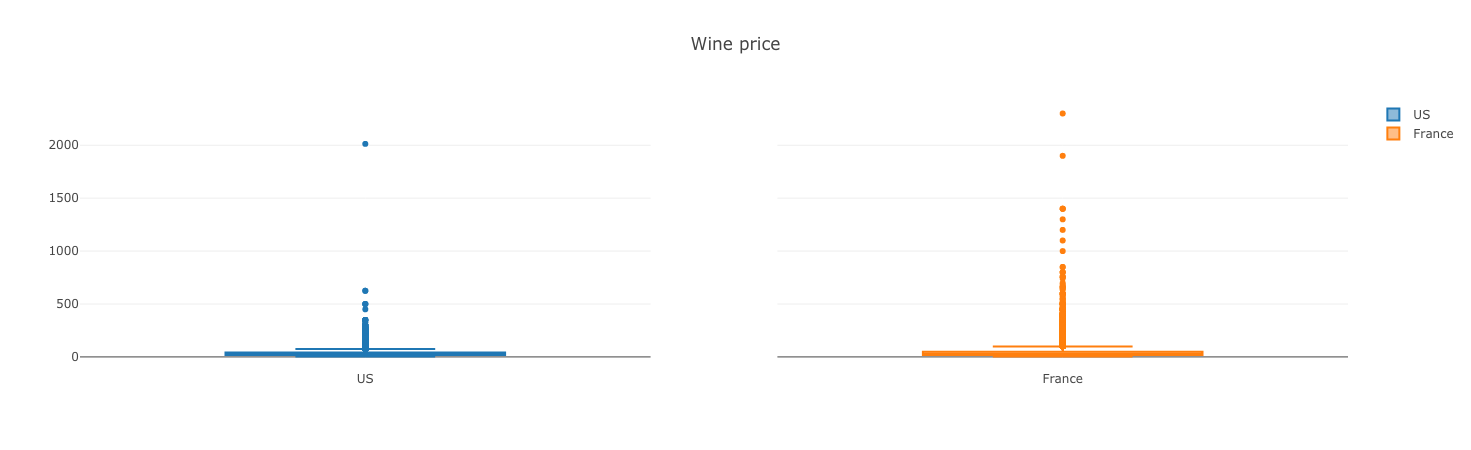

In [39]:
us_trace = go.Box(
    y = wine_us_df.price,
    name='US'
)

france_trace = go.Box(
    y = wine_france_df.price,
    name='France'
)

fig = tools.make_subplots(rows = 1, cols = 2, shared_yaxes=True)
fig.append_trace(us_trace, 1, 1)
fig.append_trace(france_trace, 1, 2)
fig.layout.update(title='Wine price')

iplot(fig)



## remove outlier

In [43]:
wine_us_re_df = wine_us_df.loc[(wine_us_df.price > -1.5*np.percentile(wine_us_df.price, 25)) & (wine_us_df.price < 1.5*np.percentile(wine_us_df.price, 75))]
wine_france_re_df = wine_france_df.loc[(wine_france_df.price > -1.5*np.percentile(wine_france_df.price, 25)) & (wine_france_df.price < 1.5*np.percentile(wine_france_df.price, 75))]

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y1 ]



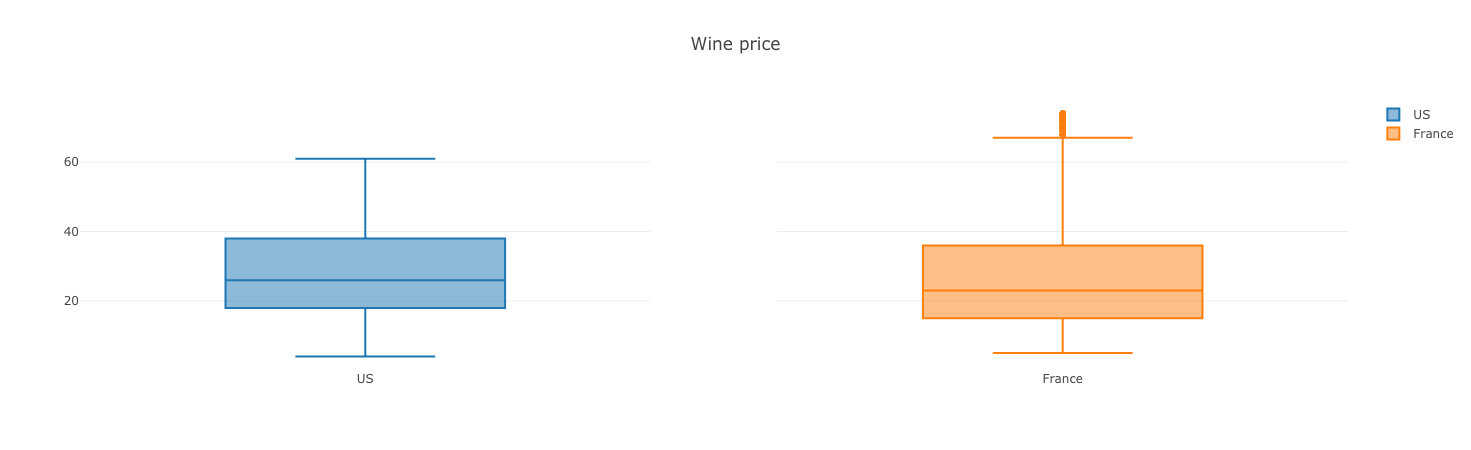

In [44]:
us_trace = go.Box(
    y = wine_us_re_df.price,
    name='US'
)

france_trace = go.Box(
    y = wine_france_re_df.price,
    name='France'
)

fig = tools.make_subplots(rows = 1, cols = 2, shared_yaxes=True)
fig.append_trace(us_trace, 1, 1)
fig.append_trace(france_trace, 1, 2)
fig.layout.update(title='Wine price')

iplot(fig)



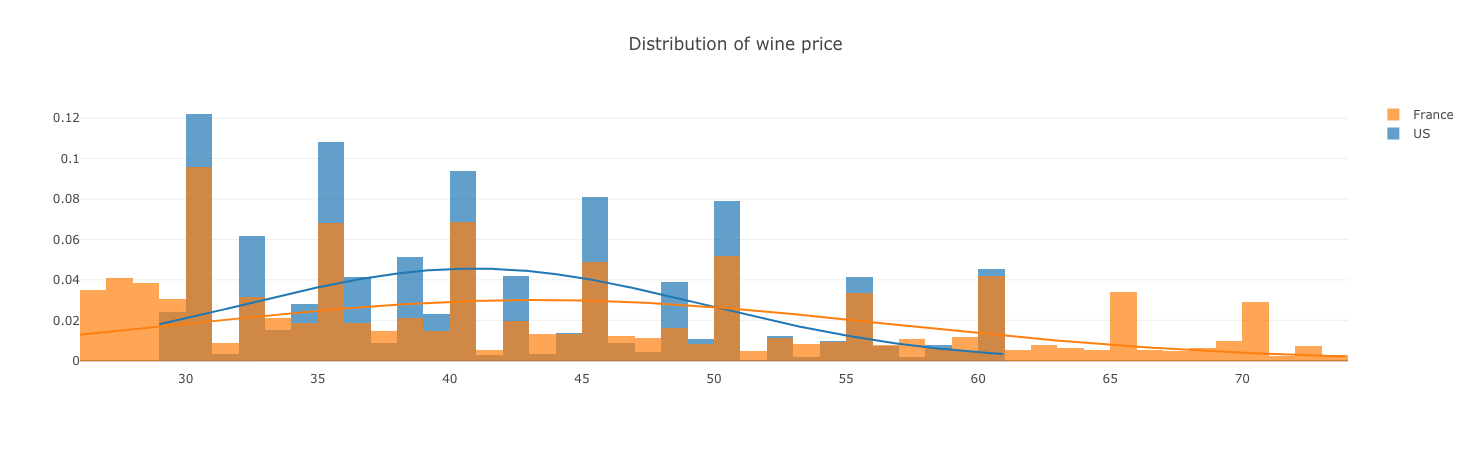

In [76]:
hist_data = [
    wine_us_re_df.price,
    wine_france_re_df.price
]

group_labels = ['US', 'France']
fig = ff.create_distplot(hist_data, group_labels, show_rug=False, curve_type='normal')
fig.layout.update(title='Distribution of wine price')
iplot(fig)
